Here we introduce relevant methods for describing the stability of HEAs and HEIs

# Stability of HEAs
The stability assessment of HEAs is relatively straightforward. It can be directly obtained as long as the elemental composition of the HEA is provided.   

You can either retrieve all computable properties directly, or obtain a single specific property.

In [1]:
from heaict.hea.HEA import HEA

The elemental composition can be represented as either decimals or integers; the function will automatically perform normalization.

In [26]:
composition = {'Ni': 0.2, 'Pd': 0.2, 'Cu': 0.2, 'Mo': 0.2, 'Mn': 0.2}

In [10]:
hea = HEA(composition)

In [11]:
hea.all_property()

[['Valence Electron Concentration (VEC)', 8.8, 'e/atom'],
 ['Atomic size difference (delta)', 7.188525010975723, '%'],
 ['Electronegativity difference (chi)', 0.2326026655049336, ''],
 ['Mixing enthalpy (\\Delta H_{mix})', -5.6000000000000005, 'kJ/mol'],
 ['Mixing entropy (\\Delta S_{mix})', 13.381611358925287, 'J/mol/K'],
 ['Correlated_mixing_entropy (S_{coor})', 9.52343172524166, 'J/mol/K']]

In [7]:
hea.Valence_electron_concentration()

8.8

The formulas and references for each property can be found in the help documentation of the corresponding function.

In [12]:
hea.Valence_electron_concentration?

Signature: hea.Valence_electron_concentration()
Docstring:
Valence Electron Concentration (VEC), dimensionless, VEC=\sum_{i=1}^{n}{c_i VEC_i}
VEC>=8(8.4) -> FCC, VEC<6.87(5.7<=VEC<=7.2) -> BCC
https://doi.org/10.1016/j.jallcom.2023.170802（https://doi.org/10.1016/j.actamat.2020.03.039）
File:      f:\jupyter-work-path\heaignn-2\heaict\hea\hea.py
Type:      method

# Stability of HEIs

The stability assessment of HEIs is relatively more complex. Its essence involves solving for the [site occupancy fractions](https://doi.org/10.1016/j.intermet.2022.107489) that minimize the free energy at different temperatures.   

First, You need to obtain the temperature-free energy change curves for the relevant pure metals and binary alloys through DFT calculations.  

In [13]:
from heaict.hea.HEI import HEI
from heaict.para import thermal_para

In [14]:
thermal_para

(['Mo', 'Mn', 'Fe', 'Ru', 'Co', 'Pd', 'Ni', 'Cu'], [2, 2, 2, 2, 2, 4, 4, 4])

When initializing the HEI module, the stoichiometric ratio of elements A and B in the end-member binary alloy must first be specified.   

Here, we use the A$_3$B$_1$ alloy.

In [17]:
hei = HEI(site_proportion=[3, 1])

Next, read the free energy curves for the pure metals and alloys.  

The relevant data for this work have been pre-computed and are stored in directory Data\Thermal_data.   

When reading this data, you must also input the number of atoms in the unit cell corresponding to each free energy curve. In subsequent calculations, units related to free energy will be on a mol $\cdot$ atom basis.

In [19]:
hei.set_end_members(
    file_path=f'Data/Thermal_data/',
    file_suffix='.dat',
    file_type='qha_gibbs',
    eles=thermal_para[0],
    Natom_metal=thermal_para[1],
    Natom_member=4
)

The raw data curves and the fitted curves can be further examined using the following functions:
- **plot_fit_result**: Compare the free energy calculated values and fitted values
- **plot_TG_emember**: Function to plot free energy for a set of end members
- **get_fit_coeff**: Get the fitted coeff for free energy

Let's take a quick look at the original and fitted free energy curves for the end-member binary alloy Mn$_3$Co$_1$.

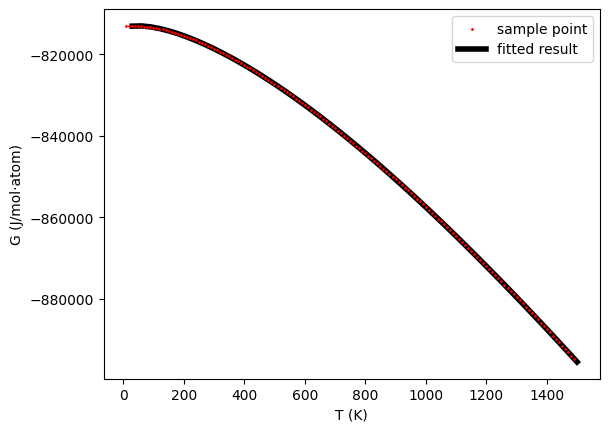

In [21]:
hei.plot_fit_result(
    thermal_data=f'Data/Thermal_data/Mn3Co1.dat',
    Natom=4,
    file_type='qha_gibbs'
)

When solving for the optimal occupancy fractions, you should specify the alloy composition and temperature range.  

Here, we attempt to solve for the site occupancy fraction preferences of each element in the equiatomic high-entropy alloy NiPuCuMoMn across the temperature range of 300 to 1200 K.  

You can also specify initial site occupancy fractions for one site when setting composition. This provides a starting point for the solver; try setting initial values if you encounter convergence issues.  

Note that, unlike the HEA section, only **fractional compositions** are allowed here.

In [29]:
hei.set_composition(Ecomposition=composition, occupy_site1={})

In [31]:
hei.solve_site_prefer(
    Tmin=300,
    Tmax=1500,
    Tpoint=50
)

Upon completion of the solution, the results can be viewed using the following related functions:
- **plot_site_prefer**: Plot the solved site preference
- **plot_TG_spref**: Plot the free energy of the alloy at the lowest energy (best site occupation)
- **plot_ce_spref**: Plot the configurational entropy of the alloy at the lowest energy (best site occupation)  

The data corresponding to the optimal solution at each temperature can be viewed through variables such as **sp_occp_site1**, **sp_occp_site2**, **sp_G**, **sp_T**, **sp_entropy**.

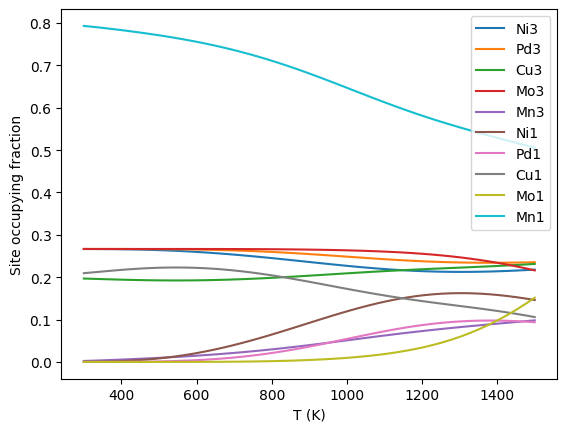

In [34]:
hei.plot_site_prefer()

In [36]:
hei.sp_occp_site1[0]

array([0.26659167, 0.26666302, 0.19683681, 0.26666667, 0.00224182])

In [39]:
hei.sp_G[0]

-1438.205827403109